In [1]:
import importlib
from importlib import reload
import ursse.sync_motion_simulation as sms
import numpy as np

In [2]:
reload(sms)

<module 'ursse.sync_motion_simulation' from '/home/ilobach/ursse/ursse/sync_motion_simulation.py'>

In [3]:
model = sms.Model(rf_noise_std=7e-5)

In [4]:
%%time
res = model.simulate()

working on 1 out of 5
working on 2 out of 5
working on 3 out of 5
working on 4 out of 5
working on 5 out of 5
CPU times: user 4min 55s, sys: 367 ms, total: 4min 55s
Wall time: 4min 54s


In [5]:
%%time
model.spad_tts = 0.400
res = model.add_spad_tts_do_fitting_and_binning(verbose=True)

working on file number 1 out of 5
working on file number 2 out of 5
working on file number 3 out of 5
working on file number 4 out of 5
working on file number 5 out of 5
CPU times: user 1min 44s, sys: 12.3 s, total: 1min 56s
Wall time: 1min 57s


ValueError: Unknown feature for comparison. Choose fromamplitude, rms_length, slow_phase, kick_to_amplitude

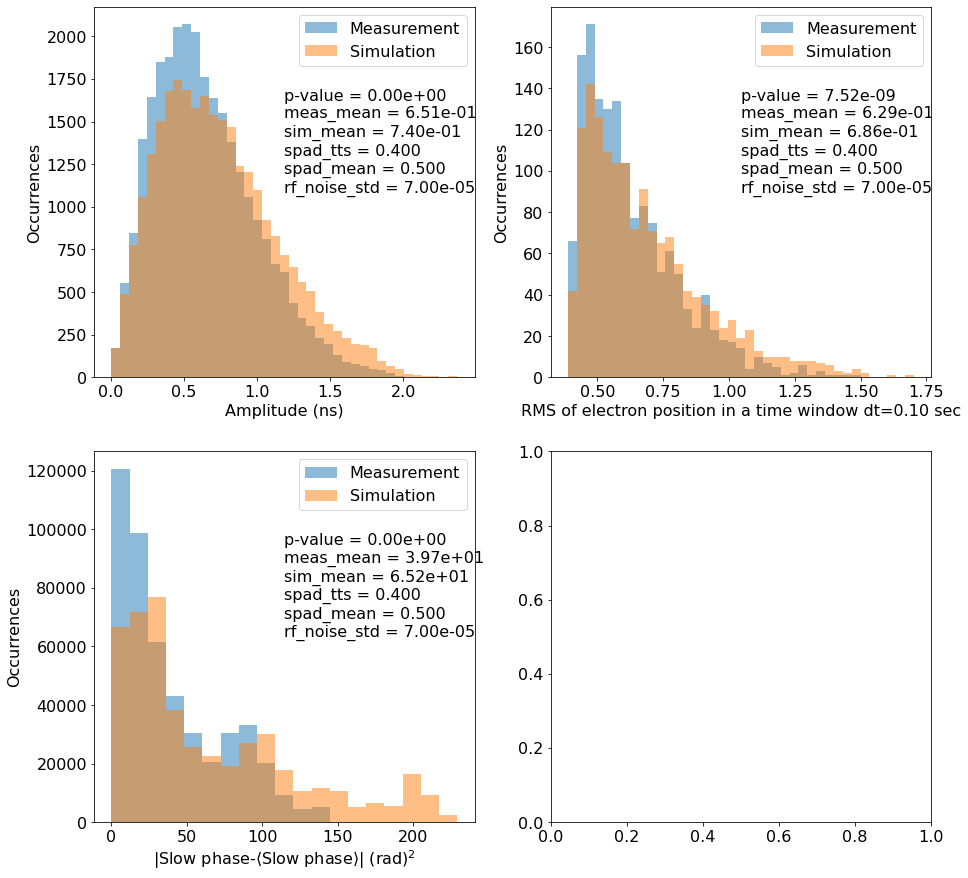

In [7]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(15,15))
flattened_axs = axs.ravel()
features = ['amplitude', 'rms_length', 'slow_phase', 'kick_to_amplitude']
nbins_arr = [40, 40, 20, 40]
for feat, nbins, ax in zip(features, nbins_arr, flattened_axs[:len(features)]):
    hist_dic = model.get_meas_sim_comparison(feature=feat, nbins=nbins, ax=ax)
plt.show()